In [ ]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2024, 1, 1)
end = datetime(2024, 12, 31)

# Create Point for Vancouver, BC
vancouver = Point(49.2497, -123.1193, 70)
algeria = Point(36.7667, 3.1)

# Get daily data for 2018
data = Daily(vancouver, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [31]:
import pandas as pd
import numpy as np

In [35]:
df_algeria_fires = pd.read_csv('../datasets/algeria_2012_forest_fires.csv')
df_portugal_fires = pd.read_csv('../datasets/portugal_2007_forest_fires.csv')

df_algeria_ne_weather = pd.read_csv('../datasets/algeria_ne_2012_weather.csv')
df_algeria_nw_weather = pd.read_csv('../datasets/algeria_nw_2012_weather.csv')
df_portugal_weather = pd.read_csv('../datasets/portugal_ne_2007_weather.csv')

In [ ]:
display(df_algeria_fires.head()), display(df_algeria_weather.head())

In [ ]:
# In df_algeria_fires, create a new column called 'date' that combines the 'year', 'month', and 'day' columns into a single datetime object
df_algeria_fires['date'] = pd.to_datetime(df_algeria_fires[['year', 'month', 'day']])
df_algeria_fires.head()

In [ ]:
df_portugal_fires.head()

In [111]:
import pandas as pd

# Loop to read 12 csv files and concatenate them into a single DataFrame
df_algeria_bejaia_2012_weather = pd.DataFrame()
for month in range(1, 13):
    month = f"0{month}" if month < 10 else month
    df_month = pd.read_csv(f'../datasets/algeria_bejaia_2012-{month}_weather.csv')
    df_algeria_bejaia_2012_weather = pd.concat([df_algeria_bejaia_2012_weather, df_month], axis=0)
df_algeria_bejaia_2012_weather.rename(columns={'date': 'day'}, inplace=True)
df_algeria_bejaia_2012_weather['date'] = pd.to_datetime(df_algeria_bejaia_2012_weather[['day', 'month', 'year']])
df_algeria_bejaia_2012_weather.drop(columns=['day', 'month', 'year'], inplace=True)
df_algeria_bejaia_2012_weather.set_index('date', inplace=True)
display(df_algeria_bejaia_2012_weather.head())

# Perform min-max scaling on every column of the DataFrame
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_algeria_bejaia_2012_weather_scaled = pd.DataFrame(scaler.fit_transform(df_algeria_bejaia_2012_weather), columns=df_algeria_bejaia_2012_weather.columns, index=df_algeria_bejaia_2012_weather.index)
display(df_algeria_bejaia_2012_weather_scaled.head())

,temp_min,temp_avg,temp_max,dew_min,dew_avg,dew_max,hum_min,hum_avg,hum_max,wind_speed_min,wind_speed_avg,wind_speed_max,pressure_min,pressure_avg,pressure_max,precip
date,,,,,,,,,,,,,,,,
2012-01-01,18.888889,11.000000,7.222222,10.000000,7.555556,2.777778,94,80.6,45,22.53076,8.529502,0.00000,1029.46256,1026.07617,1026.07617,0.0
2012-01-02,20.000000,13.111111,7.777778,12.222222,8.333333,6.111111,93,74.0,49,22.53076,17.380872,9.65604,1029.46256,1026.07617,1026.07617,0.0
2012-01-03,16.111111,13.222222,8.888889,10.000000,8.777778,7.777778,100,76.7,59,19.31208,8.046700,0.00000,1029.46256,1029.46256,1026.07617,0.0
2012-01-04,17.222222,11.111111,7.222222,10.000000,7.666667,6.111111,94,80.6,52,22.53076,6.759228,0.00000,1032.84895,1029.46256,1026.07617,0.0
2012-01-05,18.888889,12.055556,8.888889,12.777778,9.055556,7.222222,94,83.2,52,14.48406,5.149888,0.00000,1029.46256,1026.07617,1019.30339,0.0


,temp_min,temp_avg,temp_max,dew_min,dew_avg,dew_max,hum_min,hum_avg,hum_max,wind_speed_min,wind_speed_avg,wind_speed_max,pressure_min,pressure_avg,pressure_max,precip
date,,,,,,,,,,,,,,,,
2012-01-01,0.446154,0.301181,0.244444,0.288889,0.303965,0.493333,0.785714,0.710714,0.511364,0.083333,0.331034,0.000000,0.727273,0.857143,0.993443,0.0
2012-01-02,0.476923,0.375984,0.266667,0.377778,0.334802,0.573333,0.750000,0.592857,0.556818,0.083333,0.710345,0.666667,0.727273,0.857143,0.993443,0.0
2012-01-03,0.369231,0.379921,0.311111,0.288889,0.352423,0.613333,1.000000,0.641071,0.670455,0.064815,0.310345,0.000000,0.727273,0.904762,0.993443,0.0
2012-01-04,0.400000,0.305118,0.244444,0.288889,0.308370,0.573333,0.785714,0.710714,0.590909,0.083333,0.255172,0.000000,0.818182,0.904762,0.993443,0.0
2012-01-05,0.446154,0.338583,0.311111,0.400000,0.363436,0.600000,0.785714,0.757143,0.590909,0.037037,0.186207,0.000000,0.727273,0.857143,0.986885,0.0


In [112]:
df_algeria_fires = pd.read_csv('../datasets/algeria_2012_forest_fires.csv', nrows=122)
df_algeria_fires['date'] = pd.to_datetime(df_algeria_fires[['year', 'month', 'day']])
df_algeria_fires.drop(columns=['year', 'month', 'day'], inplace=True)
df_algeria_fires.set_index('date', inplace=True)

df_algeria_fires['Classes'] = df_algeria_fires['Classes'].str.strip()
df_algeria_fires['Classes'] = df_algeria_fires['Classes'].apply(lambda x: 0 if x == 'not fire' else 1)

display(df_algeria_fires.info()), display(df_algeria_fires.head(10))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2012-06-01 to 2012-09-30
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       122 non-null    object 
 1   area         122 non-null    object 
 2   Temperature  122 non-null    int64  
 3   RH           122 non-null    int64  
 4   Ws           122 non-null    int64  
 5   Rain         122 non-null    float64
 6   FFMC         122 non-null    float64
 7   DMC          122 non-null    float64
 8   DC           122 non-null    float64
 9   ISI          122 non-null    float64
 10  BUI          122 non-null    float64
 11  FWI          122 non-null    float64
 12  Classes      122 non-null    int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 13.3+ KB


None

,region,area,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
date,,,,,,,,,,,,,
2012-06-01,Bejaia,ne,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
2012-06-02,Bejaia,ne,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2012-06-03,Bejaia,ne,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
2012-06-04,Bejaia,ne,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
2012-06-05,Bejaia,ne,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
2012-06-06,Bejaia,ne,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1
2012-06-07,Bejaia,ne,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1
2012-06-08,Bejaia,ne,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1
2012-06-09,Bejaia,ne,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0


(None, None)

In [137]:
# Read Nino34 data
df_nino34 = pd.read_table('../datasets/sst_weekly.txt', delim_whitespace=True, skiprows=4, header=None, names=['week', 'nino12_sst', 'nono12_ssta', 'nino3_sst', 'nino3_ssta', 'nino34_sst', 'nino34_ssta', 'nino4_sst', 'nino4_ssta'])
# Parse the 'week' column as datetime and set it as the index
df_nino34['date'] = pd.to_datetime(df_nino34['week'])
df_nino34.drop(columns=['week'], inplace=True)

# Generate the dates to fill the gap in the data
idx = pd.date_range(start='1981-09-02', end='2024-09-18', freq='d')

# Use idx to reindex the DataFrame 
df_nino34 = df_nino34.set_index('date').reindex(idx)

# Fill the missing values using forward fill
df_nino34.fillna(method='ffill', inplace=True)

# df_nino34.set_index('date', inplace=True)
display(df_nino34.head(10))

# Scale the Nino34 data using MinMaxScaler
scaler = MinMaxScaler()
df_nino34_scaled = pd.DataFrame(scaler.fit_transform(df_nino34), columns=df_nino34.columns, index=df_nino34.index)
display(df_nino34_scaled.head(10))

C:\Users\silan\AppData\Local\Temp\ipykernel_26300\560565494.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_nino34 = pd.read_table('../datasets/sst_weekly.txt', delim_whitespace=True, skiprows=4, header=None, names=['week', 'nino12_sst', 'nono12_ssta', 'nino3_sst', 'nino3_ssta', 'nino34_sst', 'nino34_ssta', 'nino4_sst', 'nino4_ssta'])
C:\Users\silan\AppData\Local\Temp\ipykernel_26300\560565494.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_nino34['date'] = pd.to_datetime(df_nino34['week'])
C:\Users\silan\AppData\Local\Temp\ipykernel_26300\560565494.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_nino34.fillna(method='ffill', inplace=True

,nino12_sst,nono12_ssta,nino3_sst,nino3_ssta,nino34_sst,nino34_ssta,nino4_sst,nino4_ssta
1981-09-02,20.6,0.1,24.8,0.1,26.5,0.2,28.3,0.3
1981-09-03,20.6,0.1,24.8,0.1,26.5,0.2,28.3,0.3
1981-09-04,20.6,0.1,24.8,0.1,26.5,0.2,28.3,0.3
1981-09-05,20.6,0.1,24.8,0.1,26.5,0.2,28.3,0.3
1981-09-06,20.6,0.1,24.8,0.1,26.5,0.2,28.3,0.3
1981-09-07,20.6,0.1,24.8,0.1,26.5,0.2,28.3,0.3
1981-09-08,20.6,0.1,24.8,0.1,26.5,0.2,28.3,0.3
1981-09-09,20.1,0.6,24.7,0.2,26.5,0.2,28.4,0.2
1981-09-10,20.1,0.6,24.7,0.2,26.5,0.2,28.4,0.2
1981-09-11,20.1,0.6,24.7,0.2,26.5,0.2,28.4,0.2


,nino12_sst,nono12_ssta,nino3_sst,nino3_ssta,nino34_sst,nino34_ssta,nino4_sst,nino4_ssta
1981-09-02,0.186275,0.022222,0.333333,0.030303,0.421053,0.066667,0.512195,0.15
1981-09-03,0.186275,0.022222,0.333333,0.030303,0.421053,0.066667,0.512195,0.15
1981-09-04,0.186275,0.022222,0.333333,0.030303,0.421053,0.066667,0.512195,0.15
1981-09-05,0.186275,0.022222,0.333333,0.030303,0.421053,0.066667,0.512195,0.15
1981-09-06,0.186275,0.022222,0.333333,0.030303,0.421053,0.066667,0.512195,0.15
1981-09-07,0.186275,0.022222,0.333333,0.030303,0.421053,0.066667,0.512195,0.15
1981-09-08,0.186275,0.022222,0.333333,0.030303,0.421053,0.066667,0.512195,0.15
1981-09-09,0.137255,0.133333,0.317460,0.060606,0.421053,0.066667,0.536585,0.10
1981-09-10,0.137255,0.133333,0.317460,0.060606,0.421053,0.066667,0.536585,0.10
1981-09-11,0.137255,0.133333,0.317460,0.060606,0.421053,0.066667,0.536585,0.10


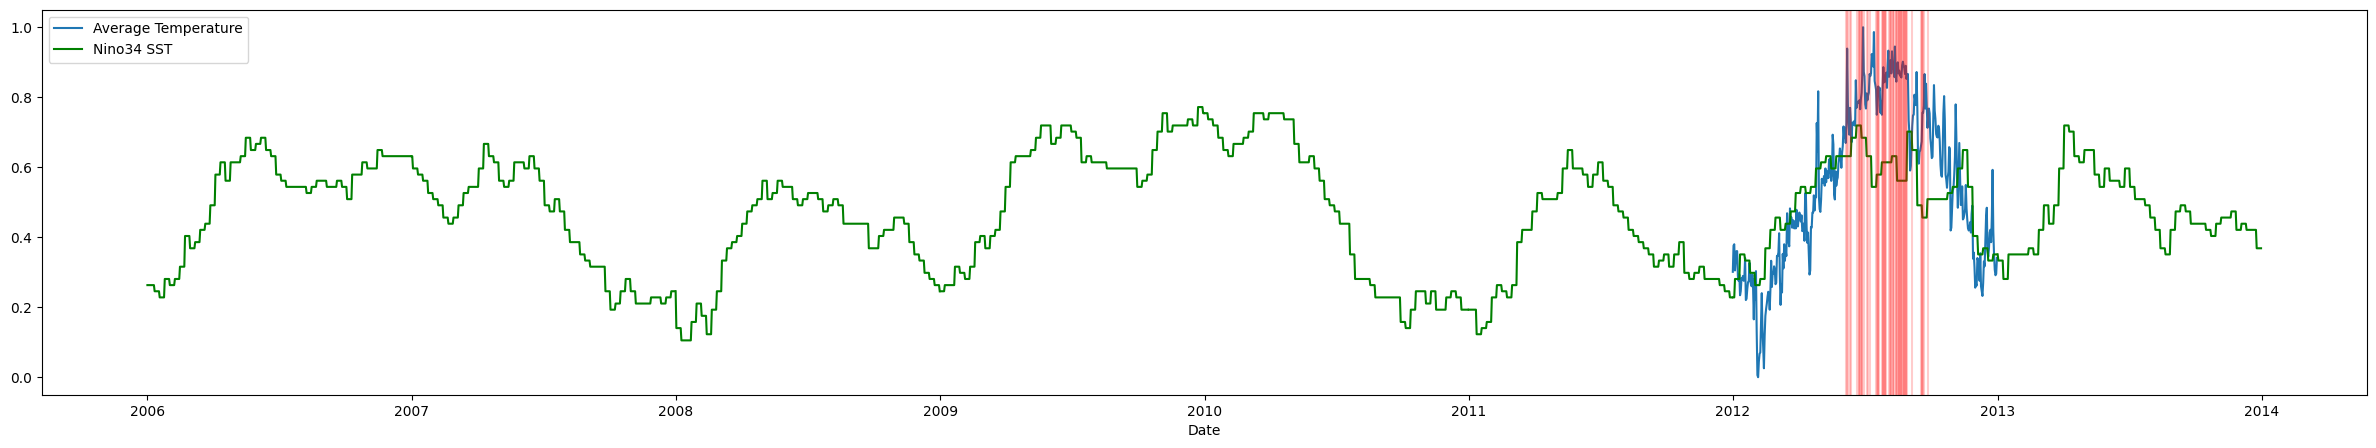

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the average temperature with min, max as error band using seaborn
plt.figure(figsize=(30, 5))
sns.lineplot(data=df_algeria_bejaia_2012_weather_scaled['temp_avg'], label='Average Temperature')
# plt.fill_between(df_algeria_bejaia_2012_weather.index, df_algeria_bejaia_2012_weather['temp_min'], df_algeria_bejaia_2012_weather['temp_max'], alpha=0.2)
# Add humidity to the plot
# sns.lineplot(data=df_algeria_bejaia_2012_weather_scaled['hum_avg'], label='Average Humidity')
# Add wind speed to the plot
# sns.lineplot(data=df_algeria_bejaia_2012_weather_scaled['wind_speed_avg'], label='Average Wind Speed')

sns.lineplot(data=df_nino34_scaled['nino34_sst']['2006'], color='g', label='Nino34 SST')
sns.lineplot(data=df_nino34_scaled['nino34_sst']['2007'], color='g')
sns.lineplot(data=df_nino34_scaled['nino34_sst']['2008'], color='g')
sns.lineplot(data=df_nino34_scaled['nino34_sst']['2009'], color='g')
sns.lineplot(data=df_nino34_scaled['nino34_sst']['2010'], color='g')
sns.lineplot(data=df_nino34_scaled['nino34_sst']['2011'], color='g')
sns.lineplot(data=df_nino34_scaled['nino34_sst']['2012'], color='g')
sns.lineplot(data=df_nino34_scaled['nino34_sst']['2013'], color='g')

plt.ylabel('')
plt.xlabel('Date')
plt.legend( loc='upper left')
# Adding vertical lines to indicate the forest fires by checking Classes column for the forest fires events
for date in df_algeria_fires[df_algeria_fires['Classes'] == 1].index:
    plt.axvline(x=date, color='r', linestyle='-', alpha=0.2)

# Add red bubble to indicate the forest fires
# for date in df_algeria_fires[df_algeria_fires['Classes'] == 1].index:
    # plt.scatter(x=date, y=df_algeria_bejaia_2012_weather_scaled.loc[date, 'temp_avg'], color='r', marker='o', s=100, alpha=0.5)

plt.show()

In [ ]:
df_algeria_fires = pd.read_csv('../datasets/algeria_2012_forest_fires.csv', nrows=122)
df_algeria_fires['date'] = pd.to_datetime(df_algeria_fires[['year', 'month', 'day']])
df_algeria_fires.drop(columns=['year', 'month', 'day'], inplace=True)
df_algeria_fires.set_index('date', inplace=True)

df_algeria_fires['Classes'] = df_algeria_fires['Classes'].str.strip()